## Scrubber Discharge Project
Exploring the output files generated by the Salish Sea Atlantis Model
for Scrubber Discharge Project - preliminary runs (updated March 2023)

- scenario 1: 1-year discharge for Jan 2019 - Dec 2019
- scenario 2: 5-year discharge for Jan 2019 - Dec 2024
- scenario 3: 10-year discharge for Jan 2019 - Dec 2029

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot

### Define scenario and control files

In [2]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_control/outputSalishSea.nc"
scenario2019_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2019/outputSalishSea.nc"
scenario2024_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2024/outputSalishSea.nc"
scenario2029_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2029/outputSalishSea.nc"

control = xr.open_dataset(str(control_file), decode_cf=True)
scenario2019 = xr.open_dataset(str(scenario2019_file), decode_cf=True)
scenario2024 = xr.open_dataset(str(scenario2024_file), decode_cf=True)
scenario2029 = xr.open_dataset(str(scenario2029_file), decode_cf=True)

t = np.ma.filled(scenario2019.variables['t'], np.nan)

In [18]:
#t_corrected = t - np.timedelta64(578, 'D')

start = 40 #112
end =  120 #t.size-1

time = t[start:end]
event_start = np.datetime64('2019-08-01')

In [14]:
print(t[63], t[83], t[103])

2022-09-07T14:00:00.000000000 2027-09-01T14:00:00.000000000 2032-08-25T14:00:00.000000000


In [15]:
days = [63, 83, 103]
data = {'2019': [], '2024': [],'2029': []}

Phenanthrene concentrations in each scenario

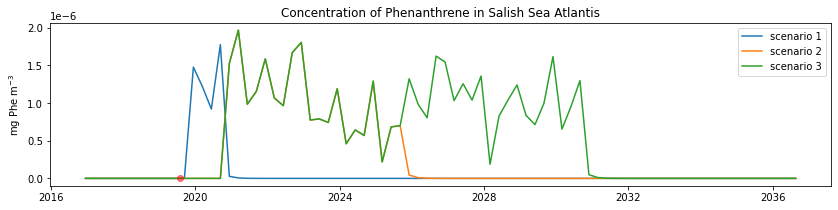

In [19]:
splot.plot_pah('Phenanthrene', scenario2019, scenario2024, scenario2029, time, start, end, event_start)

Lower trophic levels

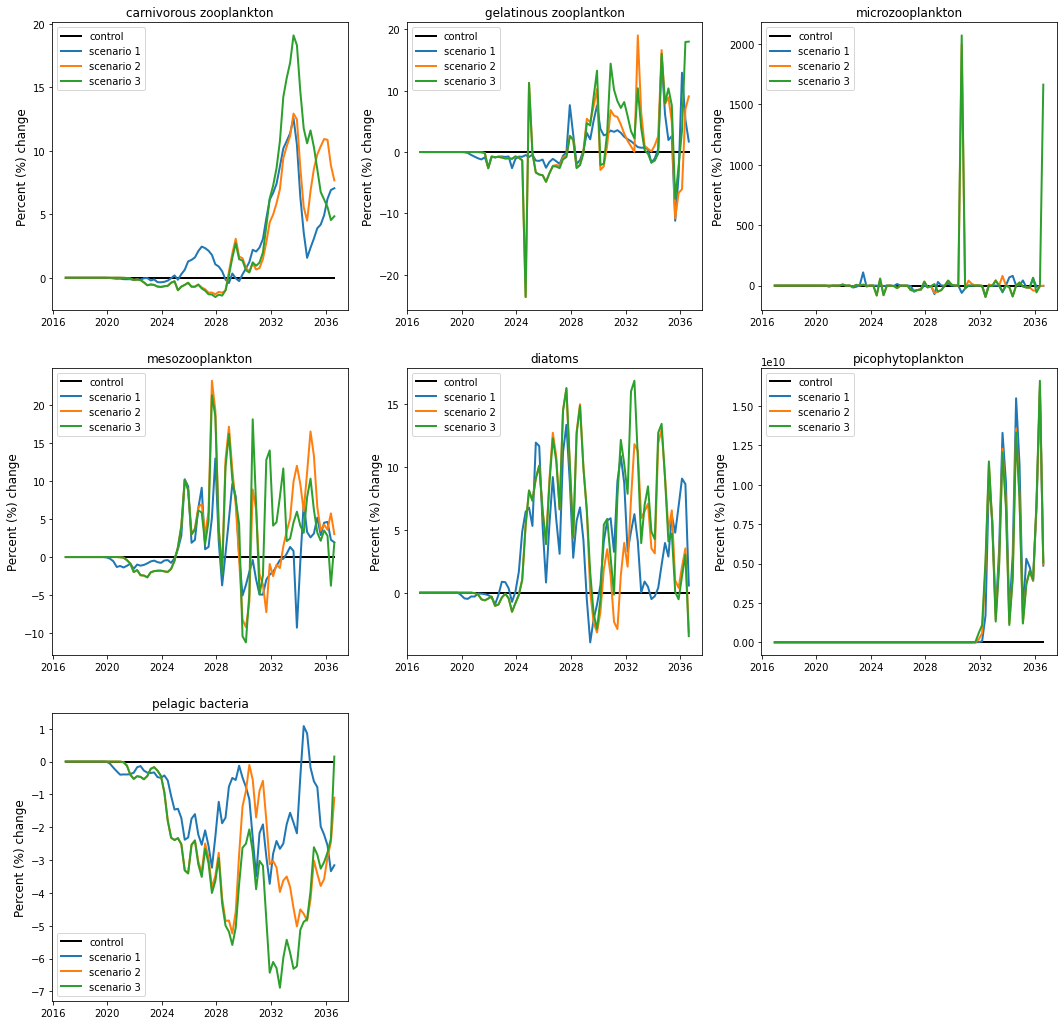

In [23]:
splot.pelagic_compare_scenarios(groups.plankton, scenario2019, scenario2024, scenario2029, control, time, start, end)

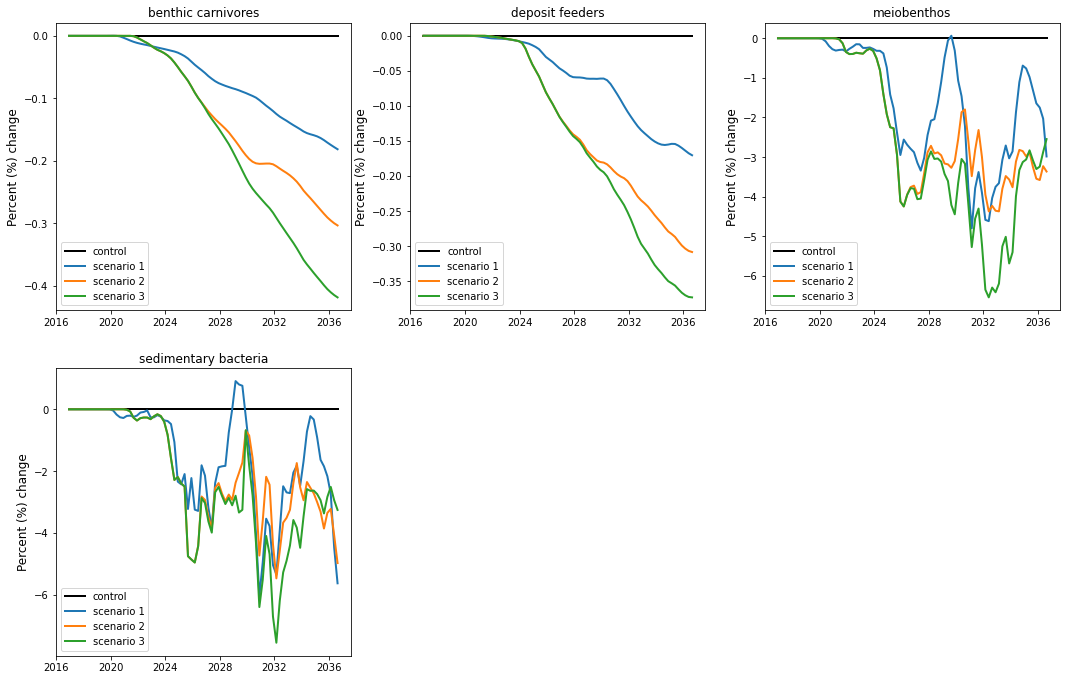

In [25]:
splot.sediment_compare_scenarios(groups.sediment_feeders, scenario2019, scenario2024, scenario2029, control, time, start, end)


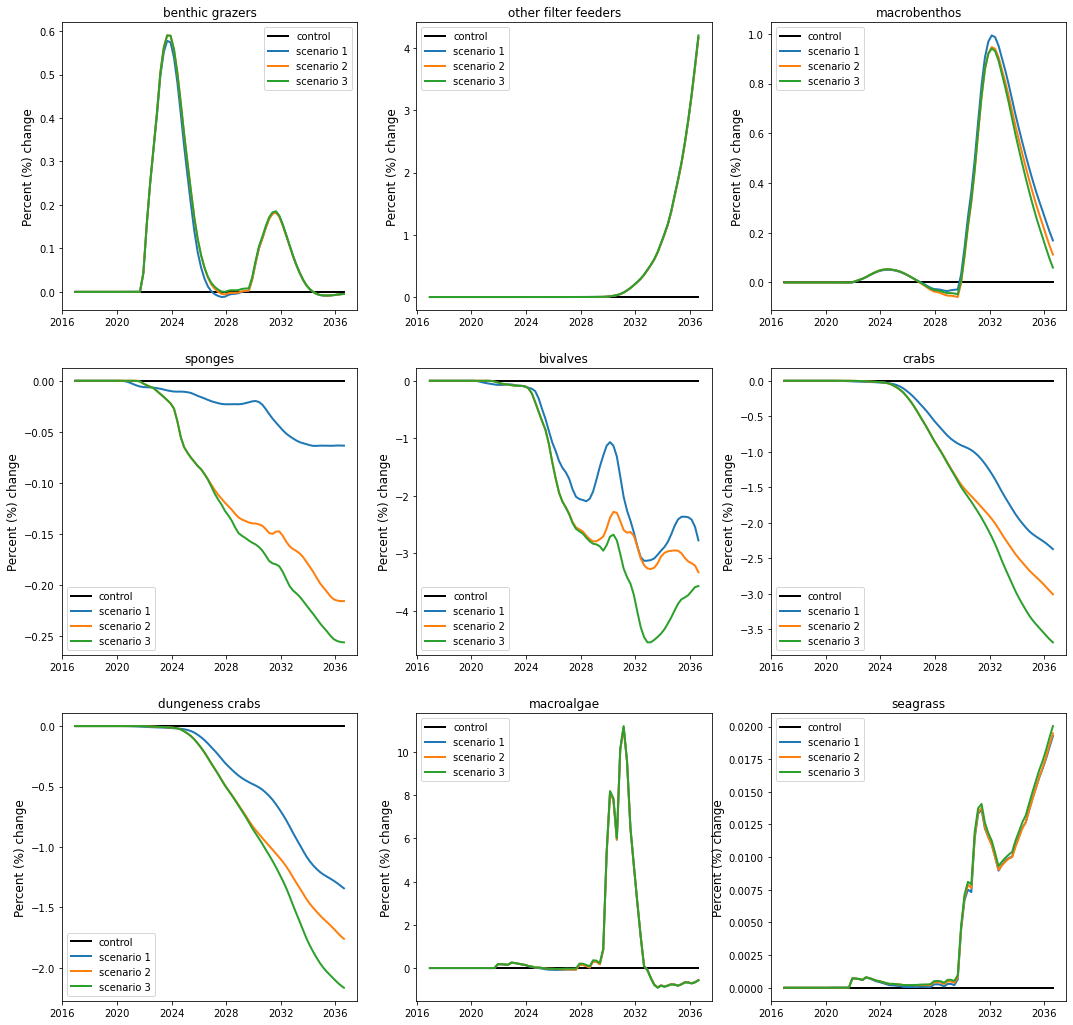

In [26]:
splot.benthic_compare_scenarios(groups.benthos, scenario2019, scenario2024, scenario2029, control, time, start, end)

Zooming in on years 2019-2029

In [33]:
end2029 =  91 #t.size-1 # numpy.datetime64('2029-08-29T14:00:00.000000000')
end2029time = t[start:end2029]

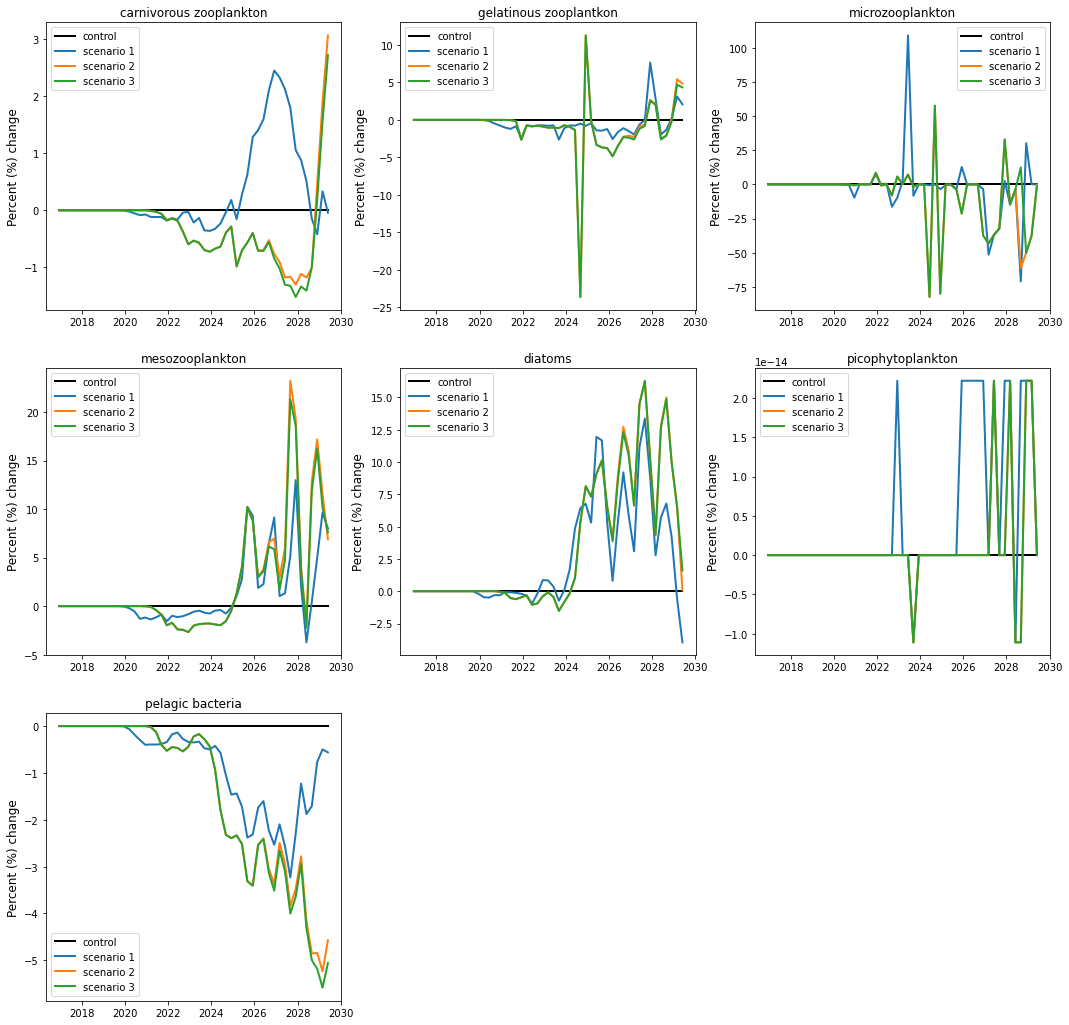

In [34]:
splot.pelagic_compare_scenarios(groups.plankton, scenario2019, scenario2024, scenario2029, control, end2029time, start, end2029)

In [37]:
t[72]

numpy.datetime64('2024-12-04T14:00:00.000000000')

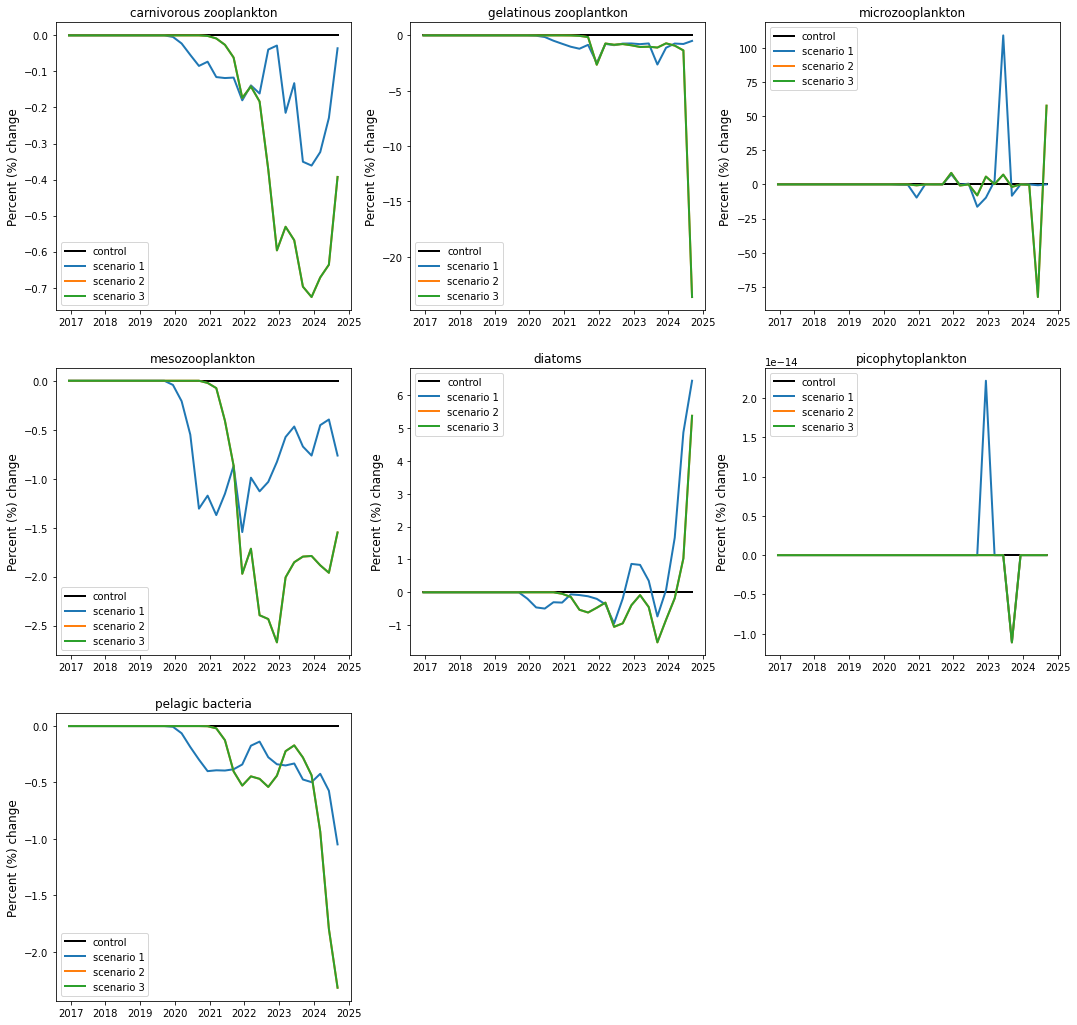

In [38]:
end2024 =  72 #t.size-1
end2024time = t[start:end2024]
splot.pelagic_compare_scenarios(groups.plankton, scenario2019, scenario2024, scenario2029, control, end2024time, start, end2024)

### Checking old scenarios against the new runs

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

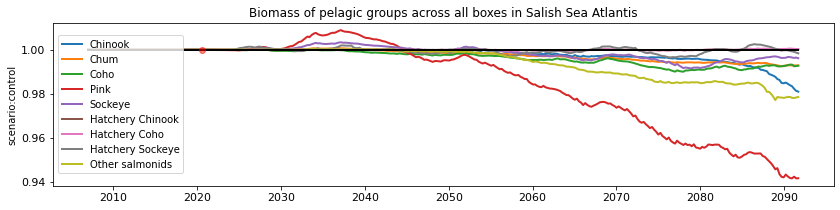

In [4]:
splot.plot_pelagic(groups.salmon, scenario2019, control, time, start, end, event_start)

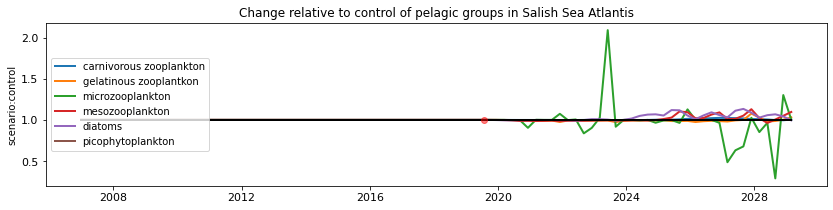

In [21]:
splot.plot_pelagic(groups.plankton, scenario2019, control, time, start, end, event_start)

In [31]:
print(t[51], t[55], t[59] )

2019-09-11T14:00:00.000000000 2020-09-09T14:00:00.000000000 2021-09-08T14:00:00.000000000


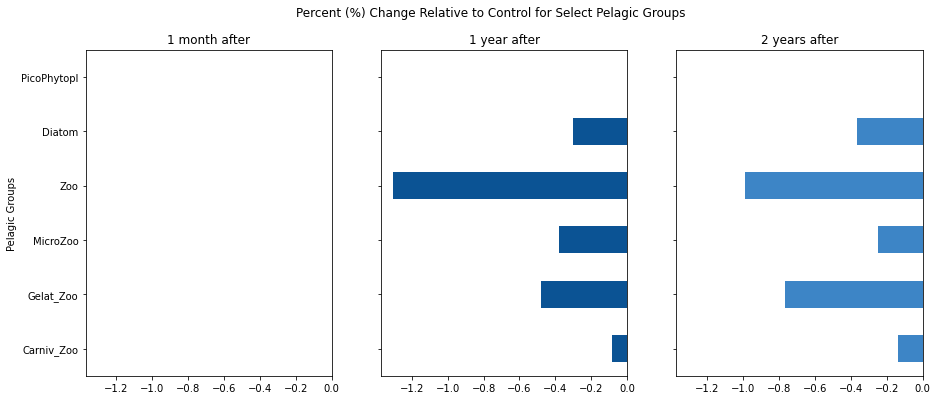

In [4]:
splot.boxplot_pelagic(groups.plankton, scenario2019, control, days, data)

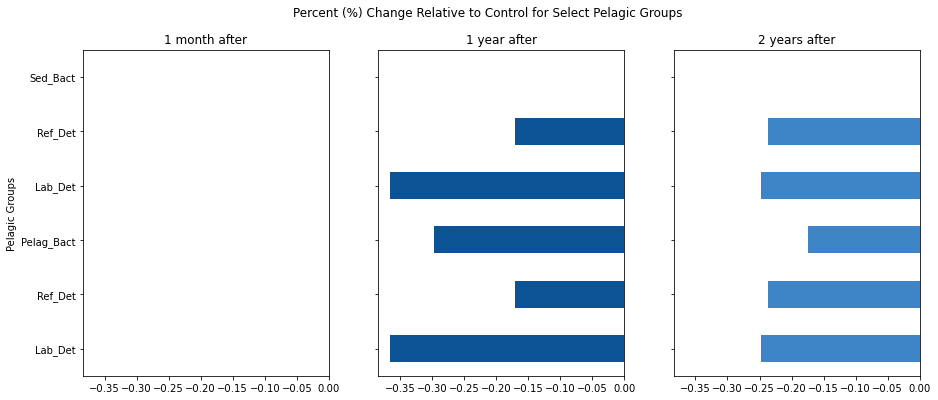

In [5]:
splot.boxplot_pelagic(groups.bacteria, scenario2019, control, days, data)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of groups in sediment in Salish Sea Atlantis'}, ylabel='scenario:control'>)

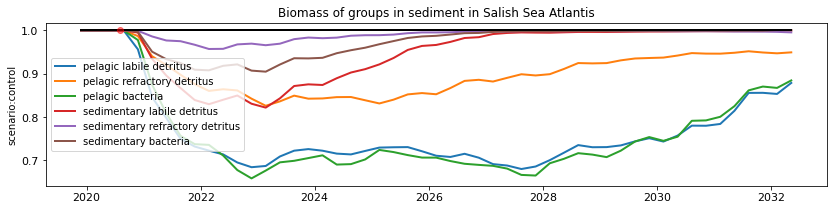

In [48]:
splot.plot_bacteria(scenario2019, control, time, start, end, event_start) #old run

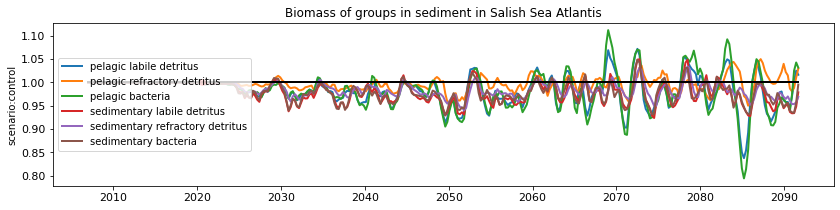

In [8]:
splot.plot_bacteria(scenario2019, control, time, start, end, event_start) #updated run

In [11]:
#t_corrected = t - np.timedelta64(578, 'D')

start = 0 #112
end = 150


time = t[start:end]

event_start = np.datetime64('2020-08-01')

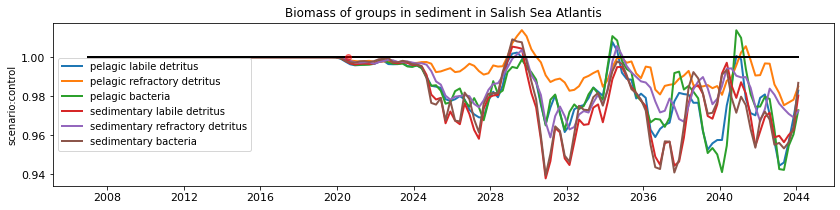

In [12]:
splot.plot_bacteria(scenario2019, control, time, start, end, event_start) #zooming in on updated run

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

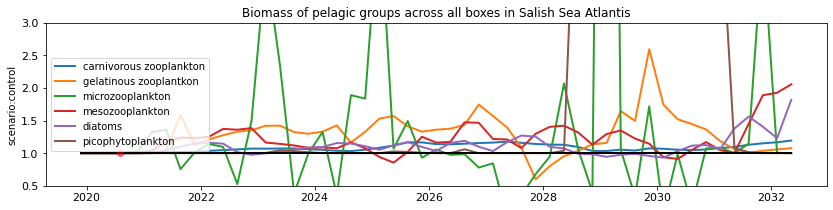

In [53]:
y_min = 0.5
y_max = 3
splot.plot_pelagic(groups.plankton, scenario2019, control, time, start, end, event_start)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of benthic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

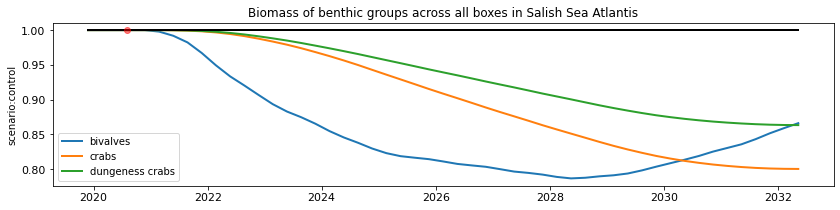

In [54]:
splot.plot_benthic(groups.shellfish, scenario2019, control, time, start, end, event_start)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of benthic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

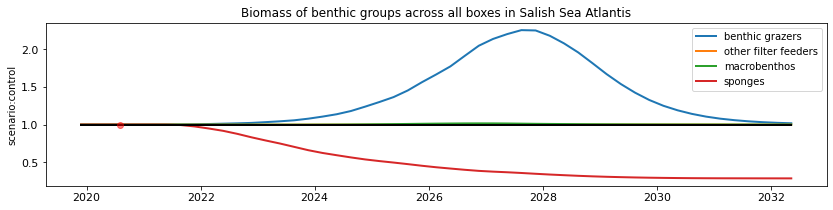

In [55]:
splot.plot_benthic(groups.benthic_invertebrates, scenario2019, control, time, start, end, event_start)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of groups in sediment in Salish Sea Atlantis'}, ylabel='scenario:control'>)

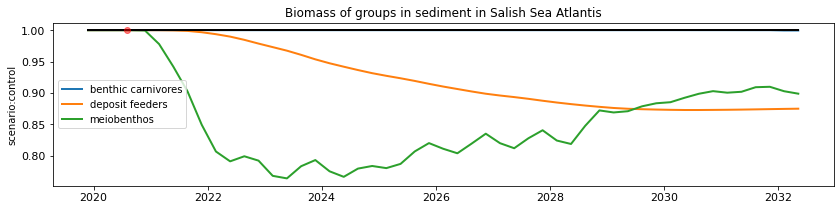

In [61]:
splot.plot_sediment(groups.benthic_feeders, scenario2019, control, time, start, end, event_start)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

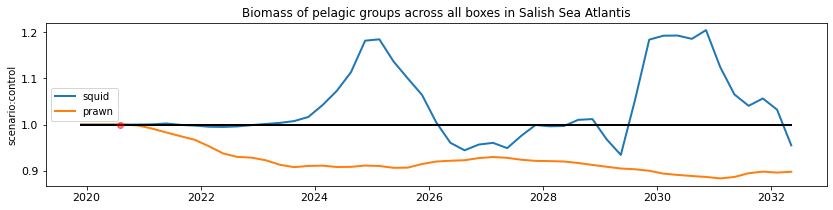

In [60]:
splot.plot_pelagic(groups.pelagic_invertebrates, scenario2019, control, time, start, end, event_start)

/tmp/ipykernel_538088/1203357538.py:14: RuntimeWarning: invalid value encountered in true_divide
  ratio = p_oiled.sum(axis=1) / p_control.sum(axis=1)
/tmp/ipykernel_538088/1203357538.py:15: RuntimeWarning: invalid value encountered in true_divide
  control_ratio = p_control.sum(axis=1) / p_control.sum(axis=1)


(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

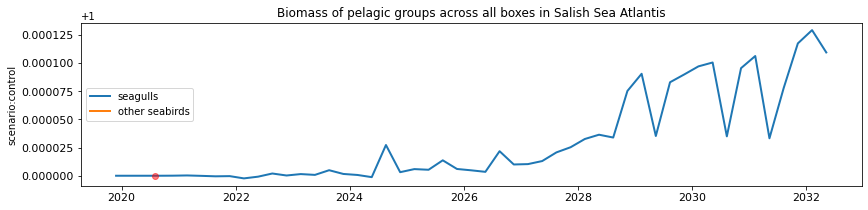

In [58]:
splot.plot_pelagic(groups.birds, scenario2019, control, time, start, end, event_start)

### Updated scenarios after Lab_det bug fix - March 2023

In [29]:
label_size = 11
font_size = 12
line_width = 2

def plot_pelagic_biomass_box(group, scenario, box_number, control, time, start, end, event_start):

    fig = plt.figure(figsize=(18, 14), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    for species in group:
        
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,box_number,0:5], np.nan) # tonnes
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,box_number,0:5], np.nan)
        p_oiled = pelagic_oiled.sum(axis=1)
        p_control = pelagic_control.sum(axis=1)
        p_max = p_oiled.max()
        p_min = p_oiled.min()

        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])
        ax.tick_params(labelsize=label_size)
        ax.set_ylabel('mg N$^{-3}$') 
        ax.set_title(str(group[species]) + ' in Atlantis box ' + str(box_number), fontsize = font_size)
        #ax.set_ylim([y_min, y_max])
        ax.plot(time, p_oiled, linewidth = 2)
        ax.plot(time, p_control, 'k',linewidth = 1)
        ax.plot([event_start,event_start],[p_min, p_max], 'r', alpha=0.5)
    
    ax.legend(['scenario', 'control', 'event start'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

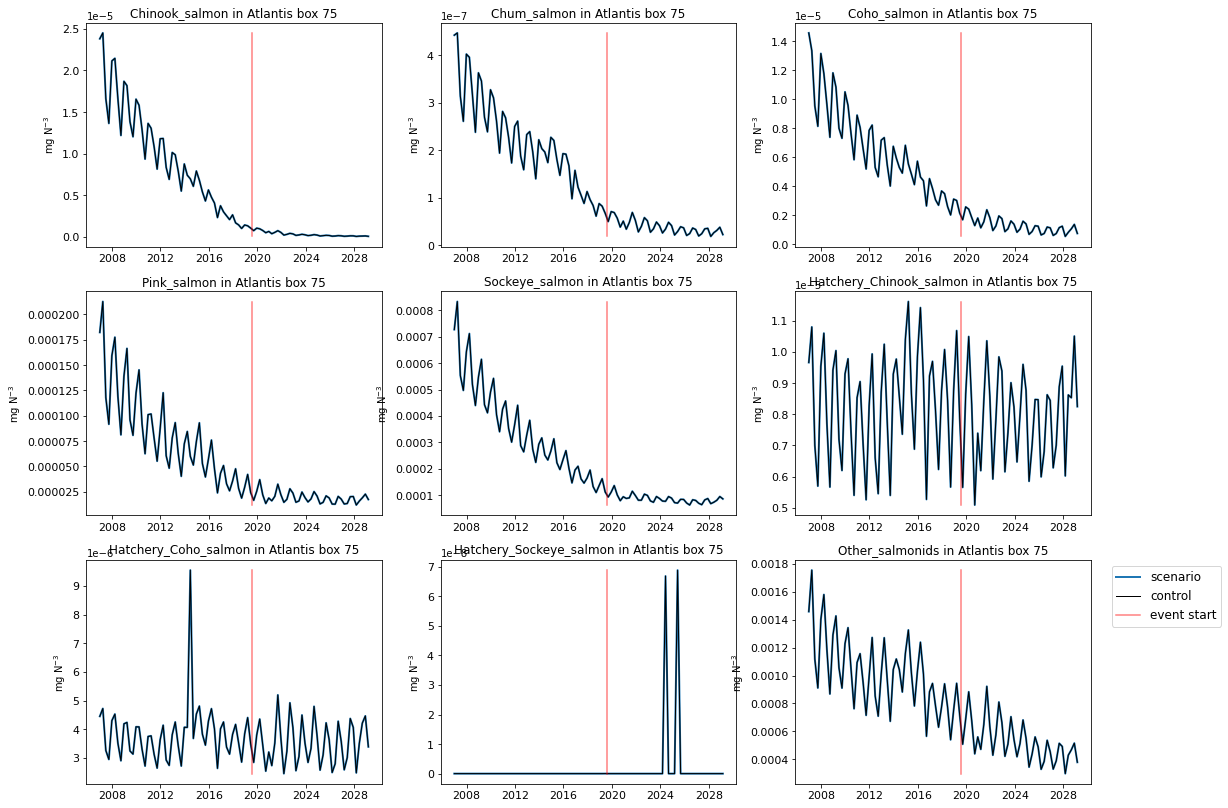

In [30]:
plot_pelagic_biomass_box(groups.salmon, scenario2019, 75, control, time, start, end, event_start)

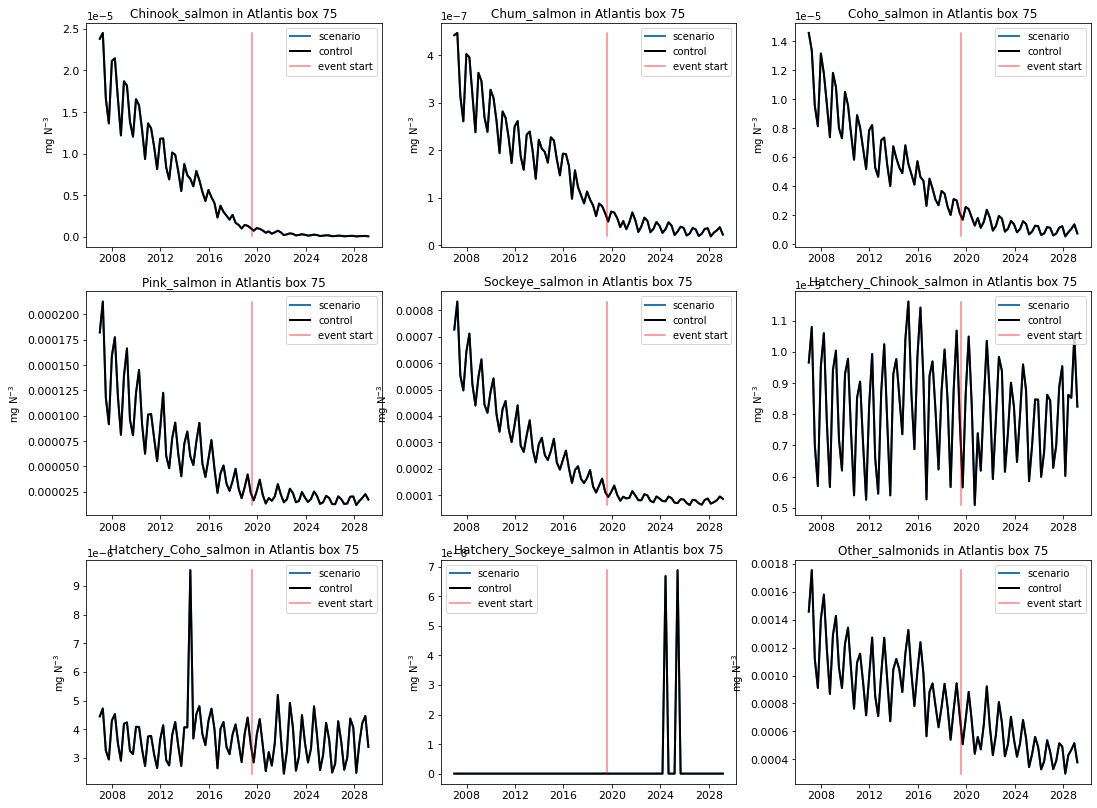

In [23]:
plot_pelagic_biomass_box(groups.salmon, scenario2019, 75, control, time, start, end, event_start)

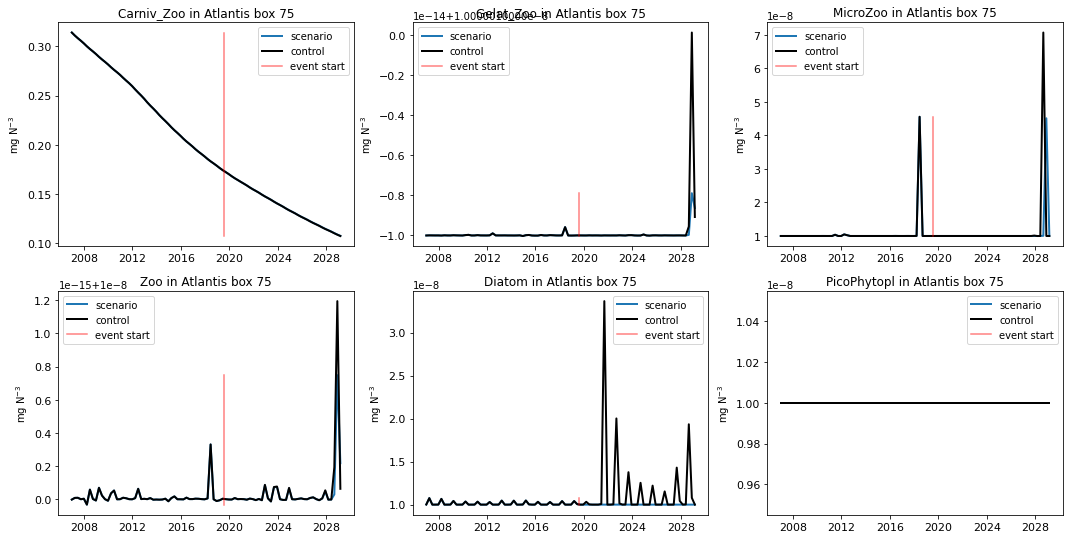

In [24]:
plot_pelagic_biomass_box(groups.plankton, scenario2019, 75, control, time, start, end, event_start)

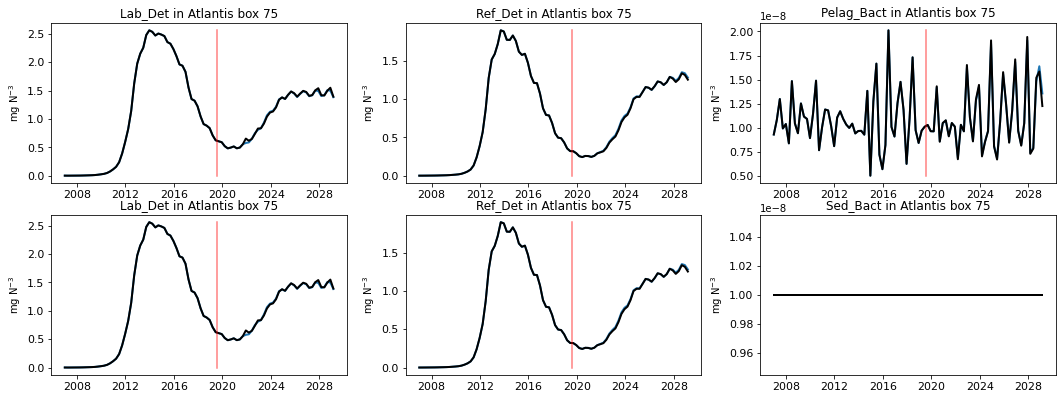

In [18]:
plot_pelagic_biomass_box(groups.bacteria, scenario2019, 75, control, time, start, end, event_start)

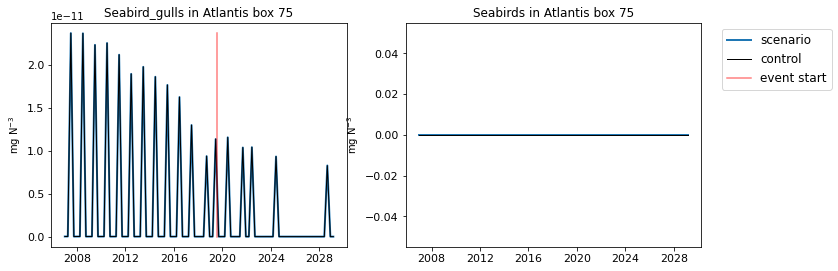

In [31]:
plot_pelagic_biomass_box(groups.birds, scenario2019, 75, control, time, start, end, event_start)